<a href="https://colab.research.google.com/github/VinodKumarKP/Python3Programming-Coursera/blob/main/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!sudo apt install tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 27 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 2s (2,958 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [26]:
from zipfile import ZipFile
from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np

def build_file_dict(zip_file_name):
    # loading the face detection classifier
    face_cascade = cv.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

    file_dict = {}
    with ZipFile(zip_file_name, 'r') as f:
        for file in f.infolist():
            with f.open(file) as zipfile:
                file_dict[file.filename] = {}
                img = Image.open(zipfile).convert('RGB')

                # Store image and text
                file_dict[file.filename]['image'] = img
                file_dict[file.filename]['text'] =  pytesseract.image_to_string(img)

                img.save('test.png')
                cvc = cv.imread('test.png')
                gray = cv.cvtColor(cvc, cv.COLOR_BGR2GRAY)
                faces = face_cascade.detectMultiScale(gray, 1.3, 5)

                file_dict[file.filename]['faces'] = []
                file_dict[file.filename]['thumbnail'] = []
                MAX_SIZE = (100, 100)
                for x,y,width,height in faces:
                    face = img.crop((x,y,x+width,y+height))
                    face.thumbnail(MAX_SIZE)
                    file_dict[file.filename]['faces'].append(face)

    return file_dict

def image_text_lookup(file_dict, text_to_be_searched):

    for k, v in file_dict.items():
        if text_to_be_searched in v['text']:
            if len(v['faces']) > 0:
                print("Results found in file {}".format(k))
                x = 0
                y = 0
                rows_size = (len(v['faces']) - 1)//5 + 1
                first_image = v['image'].crop((0, 0, 100, 100))
                first_image.thumbnail((100, 100))
                contact_sheet= Image.new(first_image.mode, (first_image.width*5,first_image.height*rows_size))

                for face in v['faces']:
                    contact_sheet.paste(face, (x, y) )
                    if x+first_image.width == contact_sheet.width:
                        x=0
                        y=y+first_image.height
                    else:
                        x=x+first_image.width
                display(contact_sheet)
            else:
                print("But there were no faces in that file!")

In [13]:
file_dict = build_file_dict('/content/small_img.zip')

Results found in file a-0.png


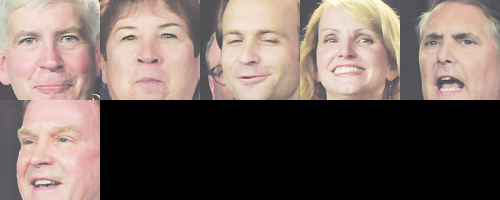

Results found in file a-3.png


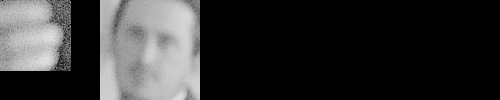

In [14]:
image_text_lookup(file_dict, 'Christopher')

In [27]:
big_file_dict = build_file_dict('/content/images.zip')

Results found in file a-0.png


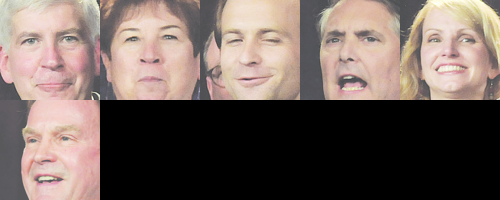

Results found in file a-1.png


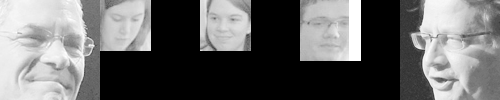

But there were no faces in that file!
Results found in file a-13.png


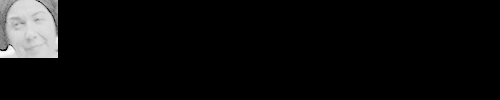

Results found in file a-2.png


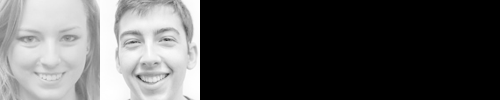

Results found in file a-3.png


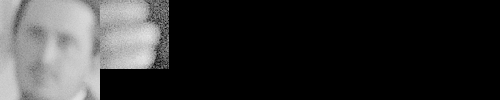

But there were no faces in that file!


In [28]:
image_text_lookup(big_file_dict, 'Mark')